In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('quora/train.csv')
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
print(df_train.size)
print(df_train.loc[df_train['is_duplicate'] == 1].size)

2425740
895578


In [5]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())
qids.head()

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [8]:
print(qids.unique().size)

537933


In [12]:
np.sum(qids.value_counts() > 1)

111780

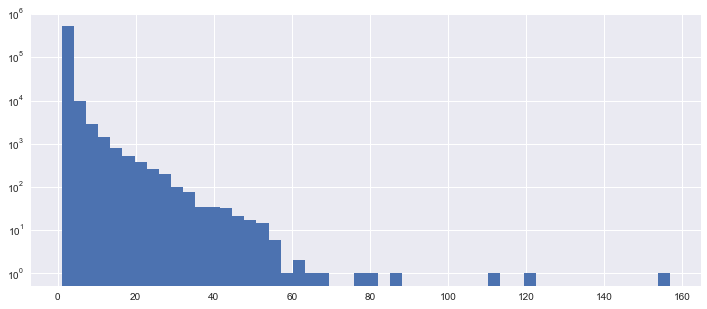

In [16]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.show()

In [19]:
from sklearn.metrics import log_loss
p = df_train['is_duplicate'].mean()


0.369197853026


In [23]:
print('Predicted score:', log_loss(df_train['is_duplicate'], np.zeros_like(df_train['is_duplicate']) + p))

('Predicted score:', 0.65852738398443544)


In [24]:
df_test = pd.read_csv('quora/test.csv')
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [25]:
sub = pd.DataFrame({'test_id': df_test['test_id'], 'is_duplicate': p})
sub.to_csv('naive_submission.csv', index=False)
sub.head()

,is_duplicate,test_id
0,0.369198,0
1,0.369198,1
2,0.369198,2
3,0.369198,3
4,0.369198,4


In [26]:
print('Total number of question pairs for testing: {}'.format(len(df_test)))

Total number of question pairs for testing: 2345796


In [45]:
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)
print(train_qs.head())
print(test_qs.head())

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object
0    How does the Surface Pro himself 4 compare wit...
1    Should I have a hair transplant at age 24? How...
2    What but is the best way to send money from Ch...
3                          Which food not emulsifiers?
4                     How "aberystwyth" start reading?
dtype: object


In [55]:
dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)
print(dist_train)
print(dist_test)
#for x in train_qs:
    #print(len(x))
    #break

0          66
1          51
2          73
3          50
4          76
5          86
6          19
7          30
8          35
9          60
10         57
11         43
12         36
13         43
14        141
15         95
16         28
17         57
18         82
19         60
20         26
21         37
22         47
23         24
24         79
25         79
26         24
27         49
28         38
29         38
         ... 
808550     40
808551     64
808552     32
808553     65
808554     42
808555     33
808556    179
808557     80
808558     44
808559     63
808560     45
808561     65
808562     87
808563     83
808564     51
808565     79
808566     24
808567     32
808568     52
808569     77
808570     55
808571     68
808572     47
808573     61
808574     51
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64
0           57
1           66
2           60
3           27
4           32
5           60
6           45
7           

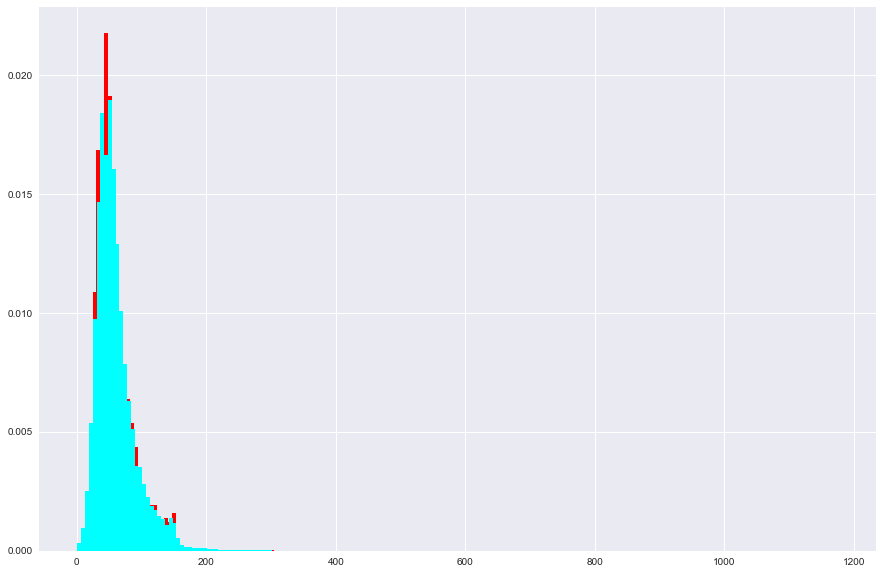

In [58]:
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, color='red', normed=True, label='train')
plt.hist(dist_test, bins=200, color='cyan', normed=True, label='test')
plt.show()